**Loading dataset**

In [4]:
import pandas as pd


df = pd.read_csv("/content/train.csv.zip")



**Cleaning dataset**

In [5]:
print(df.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [6]:
print(df.tail())

              id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  


In [7]:
#Check missing values
print(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [8]:
#Converting date column to date time
df['date'] = pd.to_datetime(df['date'])

In [9]:
#Handle missing values if any
df = df.dropna()

**2. Generate Descriptive Statistics**

In [10]:
print("Mean sales : ", df['sales'].mean())
print("Median sales : ", df['sales'].median())
print("Mode sales : ", df['sales'].mode()[0])

Mean sales :  357.77574911261894
Median sales :  11.0
Mode sales :  0.0


In [11]:
print(df['sales'].describe())

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64


**3. Visualize Sales Over Time**

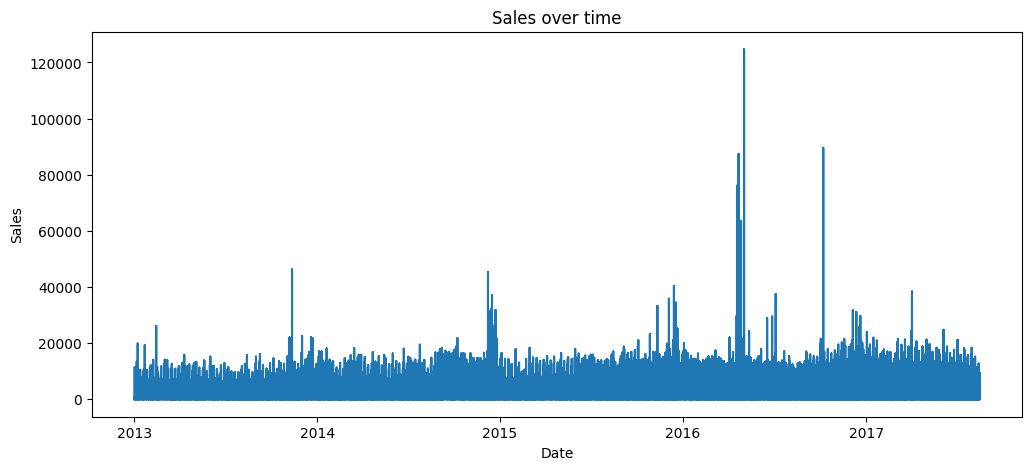

In [12]:
#Line chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['sales'])
plt.title("Sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

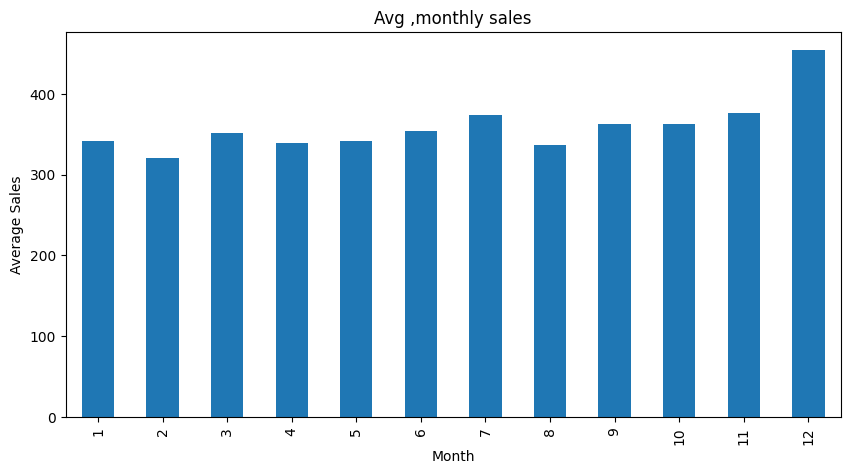

In [13]:
#Bar chart
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['sales'].mean()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title("Avg ,monthly sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


**4. Look for Seasonality Trends**

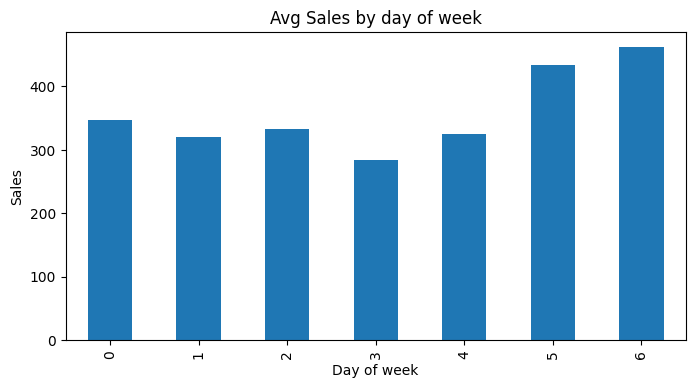

In [14]:
df['day_of_week'] = df['date'].dt.dayofweek
weekly = df.groupby('day_of_week')['sales'].mean()

plt.figure(figsize=(8,4))
weekly.plot(kind='bar')
plt.title("Avg Sales by day of week")
plt.xlabel("Day of week")
plt.ylabel("Sales")
plt.show()
